In [38]:
import pandas as pd
import numpy as np

In [39]:
df = pd.read_csv("heights.csv")

In [40]:
df.drop(columns="Unnamed: 0")

,sex,height
0,Male,75.000000
1,Male,70.000000
2,Male,68.000000
3,Male,74.000000
4,Male,61.000000
...,...,...
1045,Female,69.000000
1046,Male,69.000000
1047,Male,63.385827
1048,Male,66.000000


In [41]:
#define the outcome and predictor
y = df["sex"]
x = df["height"]
x_reshaped = x.to_numpy().reshape(-1, 1)
df["sex_encoded"] = y.map({"Male":1, "Female":0})
y_encoded=df["sex_encoded"]

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x_reshaped,y_encoded, test_size=0.5, random_state=42)

In [44]:
from sklearn.preprocessing import StandardScaler


In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [47]:
from sklearn.metrics import classification_report, confusion_matrix


In [48]:
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 58  63]
 [ 61 343]]
              precision    recall  f1-score   support

           0       0.49      0.48      0.48       121
           1       0.84      0.85      0.85       404

    accuracy                           0.76       525
   macro avg       0.67      0.66      0.67       525
weighted avg       0.76      0.76      0.76       525



In [49]:
from sklearn.metrics import roc_curve, auc


In [50]:
# Obtenir les probabilités pour la classe positive
y_scores = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)


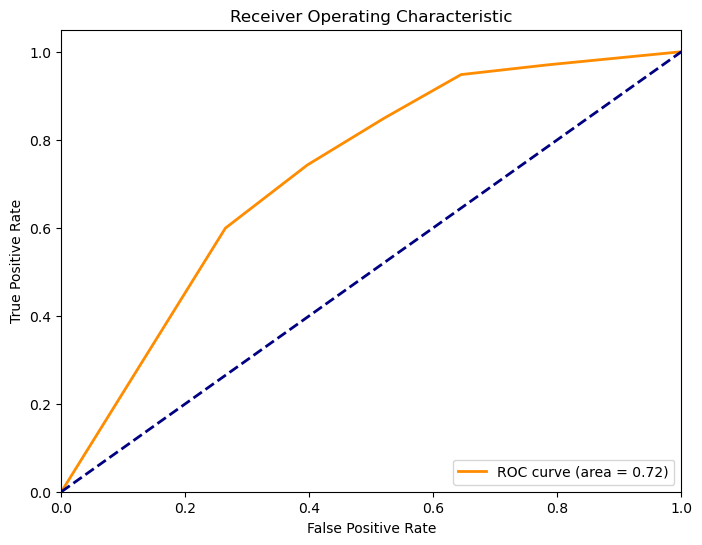

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
